<table style="width: 100%;">
    <tr>
        <td><a href="https://ieb-chile.cl/en/" target="_blank"><img src="https://raw.githubusercontent.com/IEB-BIODATA/pydwca-examples/main/images/logo/IEB.png" style="height: 100px;"></a</td>
        <td></td>
        <td><img src="https://raw.githubusercontent.com/IEB-BIODATA/pydwca-examples/main/images/logo/Biodata.png" style="height: 100px;"></td>
    </tr>
</table>

# GBIF Chile Species

In this notebooks we extract the species found in Chile according to the [GBIF species](https://www.gbif.org/species/search) and the [GBIF ocurrence](https://www.gbif.org/occurrence/search) query done in the [GBIF platform](https://www.gbif.org/).

Due to the size of this query, the package PyDwCA is not used. However, this notebook is presented because the list of chilean species is needed in other notebook examples.

Import libraries:

In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
from matplotlib_venn import venn2

In [2]:
os.makedirs("data", exist_ok=True)

## Downloading Data

The data was obtained through queries in the GBIF platform.

### Occurrence

The ocurrence list query is available at [https://api.gbif.org/v1/occurrence/download/request/0000275-250214102907787.zip](https://api.gbif.org/v1/occurrence/download/request/0000275-250214102907787.zip).

And the DOI PURL, for cite purpose, is: [https://doi.org/10.15468/dl.2hr5qd](https://doi.org/10.15468/dl.2hr5qd).

In [3]:
!wget https://api.gbif.org/v1/occurrence/download/request/0000275-250214102907787.zip -O data/chile-dwca.zip

--2025-08-06 20:44:54--  https://api.gbif.org/v1/occurrence/download/request/0000275-250214102907787.zip
Resolving api.gbif.org (api.gbif.org)... 130.225.43.2
Connecting to api.gbif.org (api.gbif.org)|130.225.43.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://occurrence-download.gbif.org/occurrence/download/request/0000275-250214102907787.zip [following]
--2025-08-06 20:44:54--  https://occurrence-download.gbif.org/occurrence/download/request/0000275-250214102907787.zip
Resolving occurrence-download.gbif.org (occurrence-download.gbif.org)... 130.225.43.36
Connecting to occurrence-download.gbif.org (occurrence-download.gbif.org)|130.225.43.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data/chile-dwca.zip’

data/chile-dwca.zip     [           <=>      ]   2.39G  15.7MB/s    in 2m 38s  

2025-08-06 20:47:33 (15.5 MB/s) - ‘data/chile-dwca.zip’ saved [2568875773]



In [4]:
!rm -Rf data/chile-dwca
!unzip data/chile-dwca.zip -d data/chile-dwca

Archive:  data/chile-dwca.zip
  inflating: data/chile-dwca/rights.txt  
  inflating: data/chile-dwca/citations.txt  
  inflating: data/chile-dwca/dataset/040c5662-da76-4782-a48e-cdea1892d14c.xml  
  inflating: data/chile-dwca/dataset/1002ac3f-0588-4994-ab47-064079c5bf32.xml  
  inflating: data/chile-dwca/dataset/776811a5-5b12-4352-82aa-00e6f132ab0d.xml  
  inflating: data/chile-dwca/dataset/d064c7a0-bd2a-45ae-b179-cef94bfcd91f.xml  
  inflating: data/chile-dwca/dataset/09c4287e-e6d5-4552-a07f-bff8a00833d8.xml  
  inflating: data/chile-dwca/dataset/110155d2-f474-4012-9209-eebf20fd9be1.xml  
  inflating: data/chile-dwca/dataset/14d5676a-2c54-4f94-9023-1e8dcd822aa0.xml  
  inflating: data/chile-dwca/dataset/1e61b812-b2ec-43d0-bdbb-8534a761f74c.xml  
  inflating: data/chile-dwca/dataset/323b0e80-5e4b-4cc4-936a-d93fc8cae9bc.xml  
  inflating: data/chile-dwca/dataset/393b8c26-e4e0-4dd0-a218-93fc074ebf4e.xml  
  inflating: data/chile-dwca/dataset/39905320-6c8a-11de-8226-b8a03c50a862.xml  
  i

### Species

The species list query is available at [https://api.gbif.org/v1/occurrence/download/request/0000360-250214102907787.zip](https://api.gbif.org/v1/occurrence/download/request/0000360-250214102907787.zip).

And the DOI PURL, for cite purpose, is: [https://doi.org/10.15468/dl.6apqab](https://doi.org/10.15468/dl.6apqab).

In [5]:
!wget https://api.gbif.org/v1/occurrence/download/request/0000360-250214102907787.zip -O data/chilean-species.zip

--2025-08-06 20:49:57--  https://api.gbif.org/v1/occurrence/download/request/0000360-250214102907787.zip
Resolving api.gbif.org (api.gbif.org)... 130.225.43.2
Connecting to api.gbif.org (api.gbif.org)|130.225.43.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://occurrence-download.gbif.org/occurrence/download/request/0000360-250214102907787.zip [following]
--2025-08-06 20:49:58--  https://occurrence-download.gbif.org/occurrence/download/request/0000360-250214102907787.zip
Resolving occurrence-download.gbif.org (occurrence-download.gbif.org)... 130.225.43.36
Connecting to occurrence-download.gbif.org (occurrence-download.gbif.org)|130.225.43.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data/chilean-species.zip’

data/chilean-specie     [         <=>        ]   3.64M  2.19MB/s    in 1.7s    

2025-08-06 20:50:00 (2.19 MB/s) - ‘data/chilean-species.zip’ saved [3819808]

In [6]:
!rm -Rf data/chilean-species
!unzip data/chilean-species.zip -d data/chilean-species

Archive:  data/chilean-species.zip
  inflating: data/chilean-species/0000360-250214102907787.csv  


## Checking species

Due its size, the `occurrence.txt` file is going to be read line by line to avoid loading the whole file to memory.

Getting the header for

In [7]:
with open("data/chile-dwca/occurrence.txt", "r") as occurrence_file:
    for line in occurrence_file:
        cells = line.split("\t")
        for i, cell in enumerate(cells):
            print(f"{i:03d}: {cell}")
        break

000: gbifID
001: accessRights
002: bibliographicCitation
003: language
004: license
005: modified
006: publisher
007: references
008: rightsHolder
009: type
010: institutionID
011: collectionID
012: datasetID
013: institutionCode
014: collectionCode
015: datasetName
016: ownerInstitutionCode
017: basisOfRecord
018: informationWithheld
019: dataGeneralizations
020: dynamicProperties
021: occurrenceID
022: catalogNumber
023: recordNumber
024: recordedBy
025: recordedByID
026: individualCount
027: organismQuantity
028: organismQuantityType
029: sex
030: lifeStage
031: reproductiveCondition
032: caste
033: behavior
034: vitality
035: establishmentMeans
036: degreeOfEstablishment
037: pathway
038: georeferenceVerificationStatus
039: occurrenceStatus
040: preparations
041: disposition
042: associatedOccurrences
043: associatedReferences
044: associatedSequences
045: associatedTaxa
046: otherCatalogNumbers
047: occurrenceRemarks
048: organismID
049: organismName
050: organismScope
051: associ

Selecting the columns to be used:
- occurrenceID
- decimalLatitude
- decimalLongitude
- taxonID
- scientificNameID
- acceptedNameUsageID
- parentNameUsageID
- originalNameUsageID
- taxonConceptID
- scientificName
- acceptedNameUsage
- parentNameUsage
- originalNameUsage
- higherClassification
- kingdom
- taxonRank
- taxonKey
- acceptedTaxonKey

In [8]:
target_columns = [
    "occurrenceID", "decimalLatitude", "decimalLongitude",
    "taxonID", "scientificNameID", "acceptedNameUsageID",
    "parentNameUsageID", "originalNameUsageID",
    "taxonConceptID", "scientificName", "acceptedNameUsage",
    "parentNameUsage", "originalNameUsage",
    "higherClassification", "kingdom", "taxonRank",
    "taxonKey", "acceptedTaxonKey"
]

In [9]:
selected_data = list()
with open("data/chile-dwca/occurrence.txt", "r") as occurrence_file:
    reading_header = True
    target_indexes = list()
    for line in tqdm(occurrence_file, desc="Reading lines", unit="line"):
        cells = line.split("\t")
        if reading_header:
            for target in target_columns:
                target_indexes.append(cells.index(target))
            reading_header = False
        else:
            row = list()
            for target in target_indexes:
                row.append(cells[target])
            selected_data.append(row.copy())
species_occurrence = pd.DataFrame(selected_data, columns=target_columns)
species_occurrence

Reading lines: 10701308line [03:43, 47812.37line/s]


,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,taxonKey,acceptedTaxonKey
0,1_1,-21.316,-70.082,,,3193861,,,,"Asteromphalus arachne (Brébisson) Ralfs, 1861",,,,,Chromista,SPECIES,3193860,3193861
1,2_1,-21.316,-70.082,,,3193861,,,,"Asteromphalus arachne (Brébisson) Ralfs, 1861",,,,,Chromista,SPECIES,3193860,3193861
2,1_3,-21.316,-70.082,,,5421511,,,,"Coscinodiscus granii Gough, 1905",,,,,Chromista,SPECIES,5421511,5421511
3,3_1,-21.316,-70.082,,,3193861,,,,"Asteromphalus arachne (Brébisson) Ralfs, 1861",,,,,Chromista,SPECIES,3193860,3193861
4,3_2,-21.316,-70.082,,,5421546,,,,"Coscinodiscus concinnus W.Smith, 1856",,,,,Chromista,SPECIES,5421546,5421546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10701302,3_10,-21.293,-70.07,,,3194102,,,,Pseudosolenia calcar-avis (Schultze) B.G.Sunds...,,,,,Chromista,SPECIES,3194102,3194102
10701303,3_12,-21.293,-70.07,,,3193456,,,,"Thalassiosira aestivalis Gran, 1931",,,,,Chromista,SPECIES,3193456,3193456
10701304,1_12,-21.293,-70.07,,,3193456,,,,"Thalassiosira aestivalis Gran, 1931",,,,,Chromista,SPECIES,3193456,3193456
10701305,1_11,-21.293,-70.07,,,5422006,,,,"Rhizosolenia imbricata Brightwell, 1858",,,,,Chromista,SPECIES,5422006,5422006


In [10]:
for kingdom in np.unique(species_occurrence["kingdom"]):
    species_occurrence[species_occurrence["kingdom"] == kingdom].to_csv(
        f"data/species_ocurrence_{kingdom}.csv",
        index=False, header=True
    )

In [11]:
os.makedirs("data/summaries", exist_ok=True)

In [12]:
summary = pd.DataFrame(species_occurrence.groupby("kingdom").size(), columns=["Occurrences"])
total = summary.sum()
summary.loc["Total"] = total
summary.to_csv("data/summaries/occurrence_per_kingdom.csv")
summary

,Occurrences
kingdom,
Animalia,10067922
Archaea,1178
Bacteria,102298
Chromista,63592
Fungi,83882
Plantae,366400
Protozoa,5879
Viruses,6
incertae sedis,10150


Selecting all species on occurrence:

In [13]:
agg_columns = dict()
for col in target_columns:
    if col != "taxonKey":
        agg_columns[col] = "first"
species_found = species_occurrence.groupby("taxonKey").agg(agg_columns).reset_index()
species_found["count"] = species_occurrence.groupby("taxonKey").size().values
species_found

,taxonKey,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,acceptedTaxonKey,count
0,0,06f47cea-ef4e-4bf1-a6e6-deff39e61986,-27.1833,-109.4444,,,,,,,incertae sedis,,,,,incertae sedis,KINGDOM,,9913
1,1,03C49B736971FFB6FC307540B5227414.mc.3B05203869...,-28.4658,-71.1858,03C49B736971FFB6FC307540B5227414.taxon,,1,,,,Animalia,,,,,Animalia,KINGDOM,1,6305
2,10000278,BOTWC447-10,-18.435,-69.512,BOLD:AAU3287,,10000278,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAU3287,,,,,Animalia,UNRANKED,10000278,2
3,1000050,JAFKPG010000000,-22.3667,-67.9833,,,1000050,,,https://www.ebi.ac.uk/ena/browser/view/Taxon:2288,"Sulfolobus Brock et al., 1972",,,,,Archaea,GENUS,1000050,1
4,10000607,ASBTL753-18,-37.80377,-73.01605,BOLD:AAG8459,,10000607,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAG8459,,,,,Animalia,UNRANKED,10000607,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48715,9997883,GWOSL852-11,-42.3168,-72.3258,BOLD:ABA9674,,9997883,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:ABA9674,,,,,Animalia,UNRANKED,9997883,1
48716,9998025,GACO170-19,-39.7,-72.326,BOLD:AAX3984,,9998025,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:AAX3984,,,,,Animalia,UNRANKED,9998025,1
48717,9998158,MGYA00166941_Bacteria::Proteobacteria:Alphapro...,-33.9116,-73.0537,,,9998158,,,,Pelagibacteraceae,,,,,Bacteria,FAMILY,9998158,417
48718,9998636,LIOAR483-18,-35.733593,-71.54775,BOLD:ACT8813,,9998636,,,http://www.boldsystems.org/index.php/Public_Ba...,BOLD:ACT8813,,,,,Animalia,UNRANKED,9998636,1


In [14]:
sp_summary = pd.DataFrame(species_found.groupby("kingdom").size(), columns=["Species"])
total = sp_summary.sum()
sp_summary.loc["Total"] = total
sp_summary.to_csv("data/summaries/species_per_kindom.csv")
sp_summary

,Species
kingdom,
Animalia,21410
Archaea,106
Bacteria,2957
Chromista,2502
Fungi,7611
Plantae,13669
Protozoa,427
Viruses,5
incertae sedis,33


In [15]:
pd.merge(sp_summary, summary, left_index=True, right_index=True).to_csv("data/summaries/summary_per_kingdom.csv")
pd.merge(sp_summary, summary, left_index=True, right_index=True)

,Species,Occurrences
kingdom,,
Animalia,21410,10067922
Archaea,106,1178
Bacteria,2957,102298
Chromista,2502,63592
Fungi,7611,83882
Plantae,13669,366400
Protozoa,427,5879
Viruses,5,6
incertae sedis,33,10150


Filtering by kingdom:
- Animalia
- Plantae
- Fungi
- Chromista

In [16]:
kingdoms = ["Animalia", "Plantae", "Fungi", "Chromista"]

In [17]:
species_occurrence = species_occurrence[
    (~species_occurrence["scientificName"].duplicated()) &
    (species_occurrence["kingdom"].isin(kingdoms))
]
species_occurrence

,occurrenceID,decimalLatitude,decimalLongitude,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,higherClassification,kingdom,taxonRank,taxonKey,acceptedTaxonKey
0,1_1,-21.316,-70.082,,,3193861,,,,"Asteromphalus arachne (Brébisson) Ralfs, 1861",,,,,Chromista,SPECIES,3193860,3193861
2,1_3,-21.316,-70.082,,,5421511,,,,"Coscinodiscus granii Gough, 1905",,,,,Chromista,SPECIES,5421511,5421511
4,3_2,-21.316,-70.082,,,5421546,,,,"Coscinodiscus concinnus W.Smith, 1856",,,,,Chromista,SPECIES,5421546,5421546
7,2_5,-21.316,-70.082,,,8030994,,,,"Detonula pumila (Castracane) Schütt, 1896",,,,,Chromista,SPECIES,8030994,8030994
9,1_6,-21.316,-70.082,,,7871668,,,,Fragilariopsis doliolus (Wallich) Medlin & P.A...,,,,,Chromista,SPECIES,7871668,7871668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699962,CH_ECMPO_LBA_MD_2019_SR-02_028,-40.933941,-73.858232,http://www.marinespecies.org/aphia.php?p=taxde...,,4304799,,,,"Prisogaster Mörch, 1850",,,,,Animalia,GENUS,4304799,4304799
10699993,CH_ECMPO_CL_2019_SB-12_110,-41.794093,-73.59021,http://www.marinespecies.org/aphia.php?p=taxde...,,2268610,,,,"Staurotheca tubifera Blanco, 1971",,,,,Animalia,SPECIES,2268612,2268610
10700039,CH_ECMPO_LBA_CL_2019_SB-11_096,-41.800171,-73.635585,http://www.marinespecies.org/aphia.php?p=taxde...,,2287825,,,,"Tawera Marwick, 1927",,,,,Animalia,GENUS,2287825,2287825
10701187,IICT-Insecta-000020,-55.033249,-69.961786,,,1499045,,,,"Tabanus triangulum Wiedemann, 1828",,,,,Animalia,SPECIES,1499045,1499045


Species found in GBIF species query:

In [18]:
species_species = pd.read_csv("data/chilean-species/0000360-250214102907787.csv", delimiter="\t", dtype=str)
species_species = species_species[species_species["kingdom"].isin(kingdoms)]  # Filter by kingdom
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,8195144,Rumex crispus L.,8195144,Rumex crispus L.,46,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Polygonaceae,2416,Rumex,2888942,Rumex crispus,8195144,NE
1,2754255,Bomarea ovallei (Phil.) Ravenna,2754255,Bomarea ovallei (Phil.) Ravenna,88,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,196,Liliales,1172,Alstroemeriaceae,7695,Bomarea,2753928,Bomarea ovallei,2754255,NE
2,7282631,Trichocereus chiloensis var. chiloensis,7282631,Trichocereus chiloensis var. chiloensis,130,VARIETY,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Cactaceae,2519,Leucostele,3231924,Leucostele chiloensis,11063606,NaN
3,11946151,Strombocarpa tamarugo (Phil.) C.E.Hughes & G.P...,5358497,Prosopis tamarugo Phil.,43,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Prosopis,2970763,Prosopis tamarugo,5358497,NE
4,1867709,"Ormiscodes cinnamomea Feisthamel, 1839",1867709,"Ormiscodes cinnamomea Feisthamel, 1839",328,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Lepidoptera,797,Saturniidae,8864,Ormiscodes,1867674,Ormiscodes cinnamomea,1867709,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,5342677,Astragalus bolivianus Phil.,5342676,Astragalus arequipensis Vogel,2,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Astragalus,2933951,Astragalus arequipensis,5342676,NE
48717,8416187,Epigloea soleiformis Döbbeler,8416187,Epigloea soleiformis Döbbeler,1,SPECIES,ACCEPTED,Fungi,5,Ascomycota,...,180,NaN,NaN,Epigloeaceae,5734,Epigloea,2626507,Epigloea soleiformis,8416187,NE
48718,2380968,"Lycodichthys antarcticus Pappenheim, 1911",2380968,"Lycodichthys antarcticus Pappenheim, 1911",1,SPECIES,ACCEPTED,Animalia,1,Chordata,...,NaN,Perciformes,587,Zoarcidae,5079,Lycodichthys,2380967,Lycodichthys antarcticus,2380968,NE
48719,12247802,"Entesia rubidaster Winterton & Irwin, 2023",12247802,"Entesia rubidaster Winterton & Irwin, 2023",4,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Diptera,811,Therevidae,3517,Entesia,1565074,Entesia rubidaster,12247802,NE


Check duplicates

In [19]:
species_species[species_species["taxonKey"].duplicated(keep=False)]

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
19385,2599923,"Pertusaria DC., 1805",2599923,"Pertusaria DC., 1805",1,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Pertusariaceae,4113,Pertusaria,2599923,Pertusaria obvelata,NaN,NaN
45352,2599923,"Pertusaria DC., 1805",2599923,"Pertusaria DC., 1805",69,GENUS,ACCEPTED,Fungi,5,Ascomycota,...,180,Pertusariales,1051,Pertusariaceae,4113,Pertusaria,2599923,NaN,NaN,NaN


Delete `GENUS` with species declares

In [20]:
species_species = species_species[
    ~(
        (species_species["taxonKey"].duplicated(keep=False)) &
        (pd.isna(species_species["species"]))
    )
]
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,8195144,Rumex crispus L.,8195144,Rumex crispus L.,46,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Polygonaceae,2416,Rumex,2888942,Rumex crispus,8195144,NE
1,2754255,Bomarea ovallei (Phil.) Ravenna,2754255,Bomarea ovallei (Phil.) Ravenna,88,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,196,Liliales,1172,Alstroemeriaceae,7695,Bomarea,2753928,Bomarea ovallei,2754255,NE
2,7282631,Trichocereus chiloensis var. chiloensis,7282631,Trichocereus chiloensis var. chiloensis,130,VARIETY,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Cactaceae,2519,Leucostele,3231924,Leucostele chiloensis,11063606,NaN
3,11946151,Strombocarpa tamarugo (Phil.) C.E.Hughes & G.P...,5358497,Prosopis tamarugo Phil.,43,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Prosopis,2970763,Prosopis tamarugo,5358497,NE
4,1867709,"Ormiscodes cinnamomea Feisthamel, 1839",1867709,"Ormiscodes cinnamomea Feisthamel, 1839",328,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Lepidoptera,797,Saturniidae,8864,Ormiscodes,1867674,Ormiscodes cinnamomea,1867709,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,5342677,Astragalus bolivianus Phil.,5342676,Astragalus arequipensis Vogel,2,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Astragalus,2933951,Astragalus arequipensis,5342676,NE
48717,8416187,Epigloea soleiformis Döbbeler,8416187,Epigloea soleiformis Döbbeler,1,SPECIES,ACCEPTED,Fungi,5,Ascomycota,...,180,NaN,NaN,Epigloeaceae,5734,Epigloea,2626507,Epigloea soleiformis,8416187,NE
48718,2380968,"Lycodichthys antarcticus Pappenheim, 1911",2380968,"Lycodichthys antarcticus Pappenheim, 1911",1,SPECIES,ACCEPTED,Animalia,1,Chordata,...,NaN,Perciformes,587,Zoarcidae,5079,Lycodichthys,2380967,Lycodichthys antarcticus,2380968,NE
48719,12247802,"Entesia rubidaster Winterton & Irwin, 2023",12247802,"Entesia rubidaster Winterton & Irwin, 2023",4,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Diptera,811,Therevidae,3517,Entesia,1565074,Entesia rubidaster,12247802,NE


In [21]:
print(f"There are {len(species_species) - len(species_occurrence)} more species found in the species query")

There are 5 more species found in the species query


Species found in the occurrence query and not in the species query:

In [22]:
no_species = species_occurrence[~species_occurrence["taxonKey"].isin(species_species["taxonKey"])][["taxonKey", "scientificName", "kingdom"]]
no_species

,taxonKey,scientificName,kingdom


Species found in the species query and not in the occurrence query:

In [23]:
species_species[~species_species["scientificName"].isin(species_occurrence["scientificName"])][["taxonKey", "scientificName", "kingdom"]]

,taxonKey,scientificName,kingdom


In [24]:
no_occurrence = species_species[~species_species["taxonKey"].isin(species_occurrence["taxonKey"])][["taxonKey", "scientificName", "taxonRank", "kingdom"]]
no_occurrence

,taxonKey,scientificName,taxonRank,kingdom
4513,221,Echinoidea,CLASS,Animalia
10994,6075928,Chimaeridae,GENUS,Animalia
12352,59,Pteridophyta,PHYLUM,Plantae
27918,7944913,"Discorbis bertheloti (d'Orbigny, 1839)",SPECIES,Chromista
42301,12295937,"Cristellaria crepidula (Fichtel & Moll, 1798)",SPECIES,Chromista


In [25]:
# Common species between those dataframe
len(species_species) - len(no_occurrence), len(species_occurrence) - len(no_species)

(45187, 45187)

Visually the species found in the occurrence query and the species query is showed below:

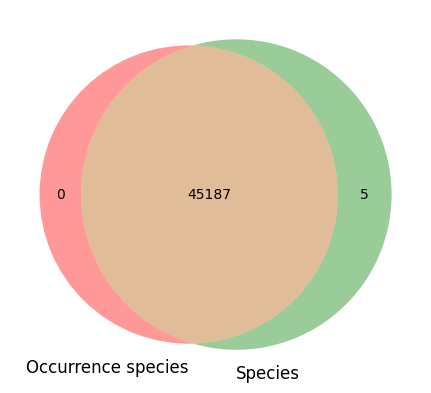

In [26]:
v = venn2((2, 3, 10), set_labels=[
    "Occurrence species",
    "Species"
])
v.get_label_by_id("10").set_text(len(no_species))
v.get_label_by_id("01").set_text(len(no_occurrence))
v.get_label_by_id("11").set_text(len(species_occurrence) - len(no_species))

## Extract list of species

We need the list of species (Species or below ranks: subspecies, variety, and form) from the dataset.

In [27]:
taxon_ranks = [
    "SPECIES", "SUBSPECIES", "VARIETY", "FORM"
]

Exploring entries of each rank:

In [28]:
species_species.groupby("taxonRank").size()

taxonRank
CLASS           141
FAMILY         1708
FORM             73
GENUS          7097
KINGDOM           4
ORDER           416
PHYLUM           47
SPECIES       28975
SUBSPECIES     1036
UNRANKED       4756
VARIETY         939
dtype: int64

In [29]:
species_species = species_species[species_species["taxonRank"].isin(taxon_ranks)]
species_species

,taxonKey,scientificName,acceptedTaxonKey,acceptedScientificName,numberOfOccurrences,taxonRank,taxonomicStatus,kingdom,kingdomKey,phylum,...,classKey,order,orderKey,family,familyKey,genus,genusKey,species,speciesKey,iucnRedListCategory
0,8195144,Rumex crispus L.,8195144,Rumex crispus L.,46,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Polygonaceae,2416,Rumex,2888942,Rumex crispus,8195144,NE
1,2754255,Bomarea ovallei (Phil.) Ravenna,2754255,Bomarea ovallei (Phil.) Ravenna,88,SPECIES,ACCEPTED,Plantae,6,Tracheophyta,...,196,Liliales,1172,Alstroemeriaceae,7695,Bomarea,2753928,Bomarea ovallei,2754255,NE
2,7282631,Trichocereus chiloensis var. chiloensis,7282631,Trichocereus chiloensis var. chiloensis,130,VARIETY,ACCEPTED,Plantae,6,Tracheophyta,...,220,Caryophyllales,422,Cactaceae,2519,Leucostele,3231924,Leucostele chiloensis,11063606,NaN
3,11946151,Strombocarpa tamarugo (Phil.) C.E.Hughes & G.P...,5358497,Prosopis tamarugo Phil.,43,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Prosopis,2970763,Prosopis tamarugo,5358497,NE
4,1867709,"Ormiscodes cinnamomea Feisthamel, 1839",1867709,"Ormiscodes cinnamomea Feisthamel, 1839",328,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Lepidoptera,797,Saturniidae,8864,Ormiscodes,1867674,Ormiscodes cinnamomea,1867709,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,5342677,Astragalus bolivianus Phil.,5342676,Astragalus arequipensis Vogel,2,SPECIES,SYNONYM,Plantae,6,Tracheophyta,...,220,Fabales,1370,Fabaceae,5386,Astragalus,2933951,Astragalus arequipensis,5342676,NE
48717,8416187,Epigloea soleiformis Döbbeler,8416187,Epigloea soleiformis Döbbeler,1,SPECIES,ACCEPTED,Fungi,5,Ascomycota,...,180,NaN,NaN,Epigloeaceae,5734,Epigloea,2626507,Epigloea soleiformis,8416187,NE
48718,2380968,"Lycodichthys antarcticus Pappenheim, 1911",2380968,"Lycodichthys antarcticus Pappenheim, 1911",1,SPECIES,ACCEPTED,Animalia,1,Chordata,...,NaN,Perciformes,587,Zoarcidae,5079,Lycodichthys,2380967,Lycodichthys antarcticus,2380968,NE
48719,12247802,"Entesia rubidaster Winterton & Irwin, 2023",12247802,"Entesia rubidaster Winterton & Irwin, 2023",4,SPECIES,ACCEPTED,Animalia,1,Arthropoda,...,216,Diptera,811,Therevidae,3517,Entesia,1565074,Entesia rubidaster,12247802,NE


Extract the need checklist of species:

In [30]:
species_species[[
    "scientificName", "genus", "taxonRank", "taxonomicStatus"
]].to_csv("data/chilean_species.tsv", sep="\t", index=False, header=True)

<table>
    <tr>
        <td colspan="3" style="text-align: center;"><p>BIODATA - <a href="https://ieb-chile.cl/en/" target="_blank">Institute of Ecology and Biodiversity</a> © 2025</p></td>
    </tr>
</table>